In [1]:
import numpy as np
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
# 路透社
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/Users/liuyue/anaconda3/envs/py36/lib/python3.6/site-packages/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/liuyue/anaconda3/envs/py36/lib/python3.6/site-packages/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
train_data.ndim

1

In [4]:
train_data.shape

(8982,)

In [5]:
test_data.shape

(2246,)

In [6]:
max([max(s) for s in train_data])

9999

In [7]:
max(train_labels)

45

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
one_hot_train_labels = to_categorical(train_labels)

In [13]:
one_hot_test_labels = to_categorical(test_labels)

In [14]:
x_train.ndim

2

In [15]:
x_train.shape

(8982, 10000)

In [16]:
from keras import models
from keras import layers

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [19]:
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
history = model.fit(partial_x_train, 
                   partial_y_train,
                    epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 322us/step - loss: 2.6721 - accuracy: 0.5013 - val_loss: 1.7684 - val_accuracy: 0.6270
Epoch 2/20
7982/7982 [==============================] - 1s 124us/step - loss: 1.4367 - accuracy: 0.7006 - val_loss: 1.3031 - val_accuracy: 0.7330
Epoch 3/20
7982/7982 [==============================] - 1s 117us/step - loss: 1.0369 - accuracy: 0.7820 - val_loss: 1.1196 - val_accuracy: 0.7600
Epoch 4/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.8071 - accuracy: 0.8317 - val_loss: 1.0318 - val_accuracy: 0.7630
Epoch 5/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.6462 - accuracy: 0.8628 - val_loss: 0.9540 - val_accuracy: 0.7940
Epoch 6/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.5146 - accuracy: 0.8903 - val_loss: 0.9133 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 128us/step - loss

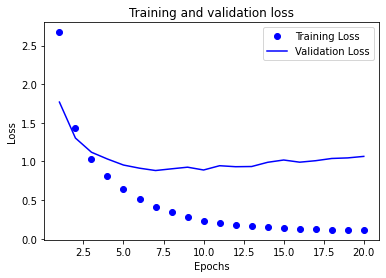

In [25]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

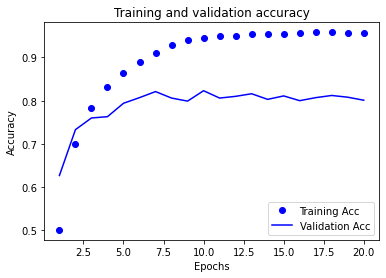

In [26]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size = 512,
         validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 191us/step - loss: 2.5434 - accuracy: 0.5237 - val_loss: 1.7024 - val_accuracy: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s 104us/step - loss: 1.3807 - accuracy: 0.7164 - val_loss: 1.3003 - val_accuracy: 0.7250
Epoch 3/9
7982/7982 [==============================] - 1s 105us/step - loss: 1.0169 - accuracy: 0.7838 - val_loss: 1.1362 - val_accuracy: 0.7500
Epoch 4/9
7982/7982 [==============================] - 1s 106us/step - loss: 0.8006 - accuracy: 0.8302 - val_loss: 1.0227 - val_accuracy: 0.7870
Epoch 5/9
7982/7982 [==============================] - 1s 114us/step - loss: 0.6366 - accuracy: 0.8695 - val_loss: 0.9690 - val_accuracy: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.5079 - accuracy: 0.8966 - val_loss: 0.9592 - val_accuracy: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 133us/step - loss: 0.410

In [28]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 208us/step


In [29]:
results

[0.9834000312740635, 0.7943009734153748]

In [30]:
model.evaluate?

In [32]:
# 完全随机地预测
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(float(np.sum(hits_array)/len(test_labels)))

0.18521816562778273


In [33]:
predictions = model.predict(x_test)

In [34]:
predictions.ndim

2

In [35]:
predictions.shape

(2246, 46)

In [36]:
np.sum(predictions[0])

1.0000002

In [37]:
np.argmax(predictions[0])

3